# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install openweathermapy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install citipy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#print(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
#openweathermap (owm) API Key
api_key = api_keys.api_key

# owm url - Fahrenheit = imperial, Celsius = metric, Kelvin = default
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Build query URL
query_url = url + "appid=" + api_key

# city_data list
city_data = []

# Print beginning of retrieval
print("Beginning Data Retrieval     ")
print("-----------------------------")

# counters created
record_counter = 1
set_counter = 1

# loop through all the cities
# "enumerate(cities)" provided by the Tutor
for x, city in enumerate(cities):
    
    # group 50 records at a time per set 
    if (x % 50 == 0 and x >= 50):
        set_counter = set_counter + 1
        record_counter = 0
    
    # url query to pull data for the city
    city_url = query_url + "&q=" + city
    
    # print record # of set # | city
    print(f"Processing Record of {record_counter} of Set {set_counter} | {city}")
    
    # record counter add 1
    record_counter = record_counter + 1

    #Run an API for each city to pull the weather in
    try: 
        #go through and make pretty with json
        
        #Between each pull, be sure to wait 1-2 seconds so that I can be within the
        #parameters of the OWM API constraints 60 calls/min = 1 record call/sec.   

        weather_response = requests.get(city_url).json()
        time.sleep(2)
        
        #extract the data from city_url and create the variables
        city_cloud = weather_response["clouds"]["all"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]
        city_humidity = weather_response["main"]["humidity"]
        city_lat = weather_response["coord"]["lat"]
        city_long = weather_response["coord"]["lon"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_wind = weather_response["wind"]["speed"]
        
        #append the city_data list
        city_data.append({"City": city,
                             "Cloudiness": city_cloud,   
                             "Country": city_country,
                             "Date": city_date,   
                             "Humidity": city_humidity,    
                             "Lat": city_lat,
                             "Lng": city_long,
                             "Max Temp": round(city_max_temp,2),
                             "Wind Speed": city_wind})

    # If there is an error, indicate that the city is not found and the record is being skipped
    #(try/except step was provided by Tutor)
    except:
        print("City not found. Skipping...")
        pass

# Print End of Retrieval
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record of 1 of Set 1 | ribeira grande
Processing Record of 2 of Set 1 | vardo
Processing Record of 3 of Set 1 | ushuaia
Processing Record of 4 of Set 1 | butaritari
Processing Record of 5 of Set 1 | cockburn town
Processing Record of 6 of Set 1 | hermanus
Processing Record of 7 of Set 1 | severo-kurilsk
Processing Record of 8 of Set 1 | along
Processing Record of 9 of Set 1 | kosh-agach
Processing Record of 10 of Set 1 | kapaa
Processing Record of 11 of Set 1 | galgani
City not found. Skipping...
Processing Record of 12 of Set 1 | bredasdorp
Processing Record of 13 of Set 1 | araguaina
Processing Record of 14 of Set 1 | victoria
Processing Record of 15 of Set 1 | torbay
Processing Record of 16 of Set 1 | busselton
Processing Record of 17 of Set 1 | hobyo
Processing Record of 18 of Set 1 | bandarbeyla
Processing Record of 19 of Set 1 | kirensk
Processing Record of 20 of Set 1 | sumbe
Processing Record of 21 of Set 1 

Processing Record of 23 of Set 4 | yulara
Processing Record of 24 of Set 4 | barcelos
Processing Record of 25 of Set 4 | najran
Processing Record of 26 of Set 4 | menongue
Processing Record of 27 of Set 4 | jaru
Processing Record of 28 of Set 4 | stoyba
City not found. Skipping...
Processing Record of 29 of Set 4 | klaksvik
Processing Record of 30 of Set 4 | coquimbo
Processing Record of 31 of Set 4 | castro
Processing Record of 32 of Set 4 | tromso
Processing Record of 33 of Set 4 | port lincoln
Processing Record of 34 of Set 4 | sur
Processing Record of 35 of Set 4 | riyadh
Processing Record of 36 of Set 4 | honiara
Processing Record of 37 of Set 4 | ponta do sol
Processing Record of 38 of Set 4 | dingle
Processing Record of 39 of Set 4 | touros
Processing Record of 40 of Set 4 | vostok
Processing Record of 41 of Set 4 | makurdi
Processing Record of 42 of Set 4 | tevaitoa
Processing Record of 43 of Set 4 | sistranda
Processing Record of 44 of Set 4 | sao paulo de olivenca
Processing 

City not found. Skipping...
Processing Record of 0 of Set 8 | porto novo
Processing Record of 1 of Set 8 | helong
Processing Record of 2 of Set 8 | isangel
Processing Record of 3 of Set 8 | kalaleh
Processing Record of 4 of Set 8 | nouadhibou
Processing Record of 5 of Set 8 | kirovskiy
Processing Record of 6 of Set 8 | morococha
Processing Record of 7 of Set 8 | ewa beach
Processing Record of 8 of Set 8 | new richmond
Processing Record of 9 of Set 8 | port blair
Processing Record of 10 of Set 8 | puerto pinasco
City not found. Skipping...
Processing Record of 11 of Set 8 | berdigestyakh
Processing Record of 12 of Set 8 | batamshinskiy
Processing Record of 13 of Set 8 | sorland
Processing Record of 14 of Set 8 | murray bridge
Processing Record of 15 of Set 8 | alta floresta
Processing Record of 16 of Set 8 | ust-maya
Processing Record of 17 of Set 8 | freetown
Processing Record of 18 of Set 8 | miraflores
Processing Record of 19 of Set 8 | tessalit
Processing Record of 20 of Set 8 | oka

Processing Record of 20 of Set 11 | iglino
Processing Record of 21 of Set 11 | key west
Processing Record of 22 of Set 11 | agnibilekrou
Processing Record of 23 of Set 11 | ayan
Processing Record of 24 of Set 11 | veraval
Processing Record of 25 of Set 11 | machiques
Processing Record of 26 of Set 11 | kopyevo
City not found. Skipping...
Processing Record of 27 of Set 11 | vila velha
Processing Record of 28 of Set 11 | bezdan
Processing Record of 29 of Set 11 | fairbanks
Processing Record of 30 of Set 11 | tutoia
Processing Record of 31 of Set 11 | sinkat
City not found. Skipping...
Processing Record of 32 of Set 11 | oyem
Processing Record of 33 of Set 11 | hue
Processing Record of 34 of Set 11 | teknaf
Processing Record of 35 of Set 11 | ambanja
Processing Record of 36 of Set 11 | nizhneyansk
City not found. Skipping...
Processing Record of 37 of Set 11 | rubtsovsk
Processing Record of 38 of Set 11 | puerto baquerizo moreno
Processing Record of 39 of Set 11 | marsh harbour
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
#print(city_data)

In [94]:
# Create a DataFrame of the city_data
city_weather_df = pd.DataFrame(city_data)

# Verify we have complete data 
city_weather_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [95]:
# Save the table to a csv file
city_weather_df.to_csv("output_data/cities.csv")

In [96]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,64,PT,1540617756,98,38.52,-28.70,68.32,19.64
1,vardo,90,US,1540616100,100,39.62,-77.74,44.60,10.29
2,ushuaia,40,AR,1540612800,66,-54.81,-68.31,48.20,6.93
3,butaritari,64,KI,1540617762,100,3.07,172.79,84.88,3.20
4,cockburn town,0,TC,1540617764,99,21.46,-71.14,82.58,15.84


In [98]:
# #Confirm that ouput file is the same
# city_weather_2_df = pd.read_csv(output_data_file)
# city_weather_2_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

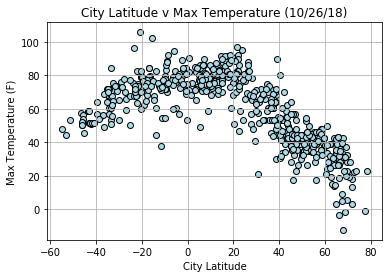

In [99]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
max_temp = city_weather_df["Max Temp"]

#Create Scatter Plot
plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Max Temperature (10/26/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_maxtemp.png")
plt.show()  

#### Latitude vs. Humidity Plot

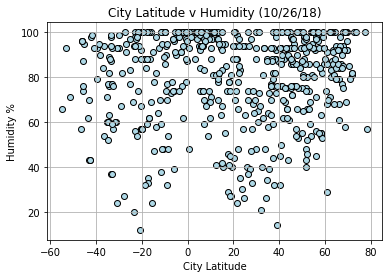

In [100]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
humidity = city_weather_df["Humidity"]

#Create Scatter Plot
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Humidity (10/26/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Humidity %", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_humidity.png")
plt.show()  

#### Latitude vs. Cloudiness Plot

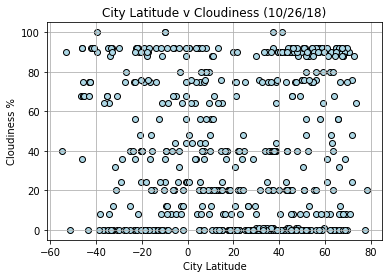

In [101]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
clouds = city_weather_df["Cloudiness"]

#Create Scatter Plot
plt.scatter(lat, clouds, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Cloudiness (10/26/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Cloudiness %", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_cloudiness.png")
plt.show()  

#### Latitude vs. Wind Speed Plot

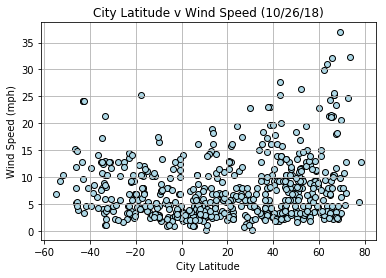

In [102]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
wind_spd = city_weather_df["Wind Speed"]

#Create Scatter Plot
plt.scatter(lat, wind_spd, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Wind Speed (10/26/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_windspeed.png")
plt.show()  